In [10]:
# Classification Neural Network

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Importing prepared dataset
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [13]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=2, units=2, kernel_initializer="uniform")`
  """
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [15]:
# Fitting the ANN to the Training set
cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100)

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
480/480 [==============================] - 0s 916us/step - loss: 0.6928 - accuracy: 0.6667
Epoch 2/100
480/480 [==============================] - 0s 375us/step - loss: 0.6918 - accuracy: 0.74790s - loss: 0.6920 - accuracy: 
Epoch 3/100
480/480 [==============================] - 0s 375us/step - loss: 0.6900 - accuracy: 0.7896
Epoch 4/100
480/480 [==============================] - 0s 396us/step - loss: 0.6870 - accuracy: 0.8083
Epoch 5/100
480/480 [==============================] - 0s 412us/step - loss: 0.6824 - accuracy: 0.8438
Epoch 6/100
480/480 [==============================] - 0s 400us/step - loss: 0.6759 - accuracy: 0.8062
Epoch 7/100
480/480 [==============================] - 0s 319us/step - loss: 0.6677 - accuracy: 0.8125
Epoch 8/100
480/480 [==============================] - 0s 377us/step - loss: 0.6576 - accuracy: 0.8333
Epoch 9/100
480/480 [==============================] - 0s 364us/step - loss: 0.6466 - accuracy: 0.8313
Epoch 10/100
480/480 [=====================

480/480 [==============================] - 0s 327us/step - loss: 0.3259 - accuracy: 0.8562
Epoch 79/100
480/480 [==============================] - 0s 344us/step - loss: 0.3250 - accuracy: 0.8542
Epoch 80/100
480/480 [==============================] - 0s 456us/step - loss: 0.3242 - accuracy: 0.8542
Epoch 81/100
480/480 [==============================] - 0s 360us/step - loss: 0.3235 - accuracy: 0.8542
Epoch 82/100
480/480 [==============================] - 0s 471us/step - loss: 0.3228 - accuracy: 0.8542
Epoch 83/100
480/480 [==============================] - 0s 429us/step - loss: 0.3221 - accuracy: 0.8542
Epoch 84/100
480/480 [==============================] - 0s 394us/step - loss: 0.3214 - accuracy: 0.8583
Epoch 85/100
480/480 [==============================] - 0s 358us/step - loss: 0.3207 - accuracy: 0.8583
Epoch 86/100
480/480 [==============================] - 0s 377us/step - loss: 0.3201 - accuracy: 0.8583
Epoch 87/100
480/480 [==============================] - 0s 425us/step - loss:

In [16]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 11]
 [ 4 50]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


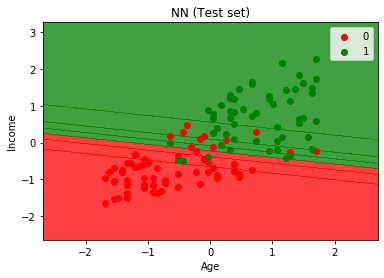

In [18]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()